In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('seattle-weather.csv')

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.shape

(1461, 6)

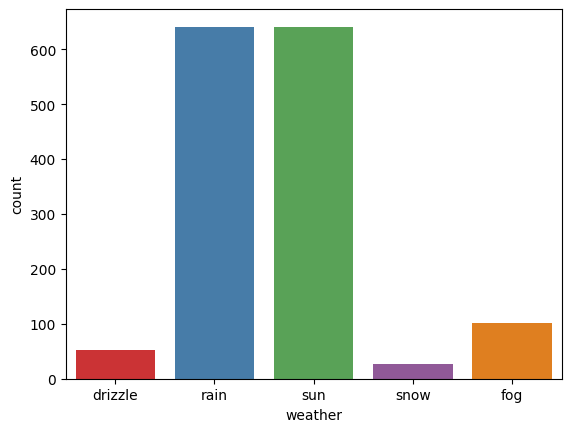

In [6]:
sb.countplot(x = "weather", data = data, palette = 'Set1');

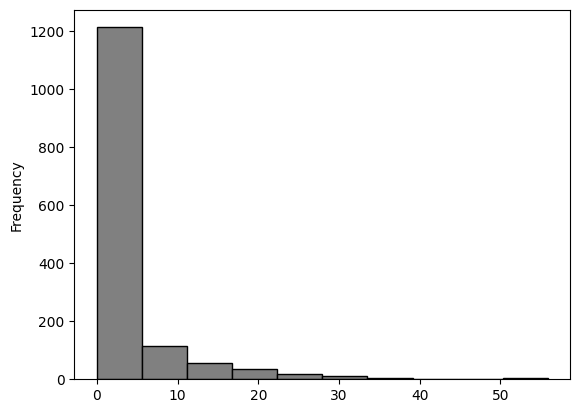

In [7]:
# EDA OF OTHER DATATYPES
data["precipitation"].plot(kind = 'hist',color='#808080',edgecolor='#000000')
plt.show()

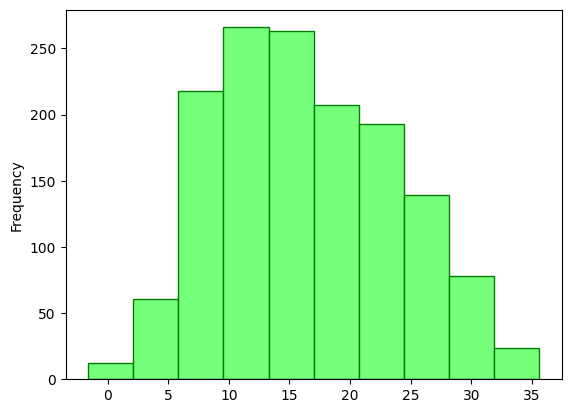

In [8]:
data["temp_max"].plot(kind = 'hist',color='#76FF7B',edgecolor='green')
plt.show()

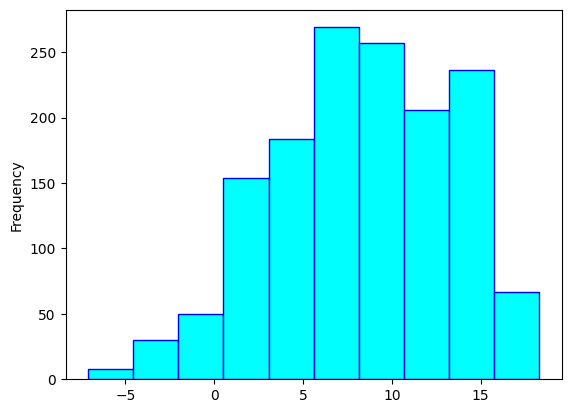

In [9]:
data["temp_min"].plot(kind = 'hist',color='#00FFFF',edgecolor='#0000FF')
plt.show()

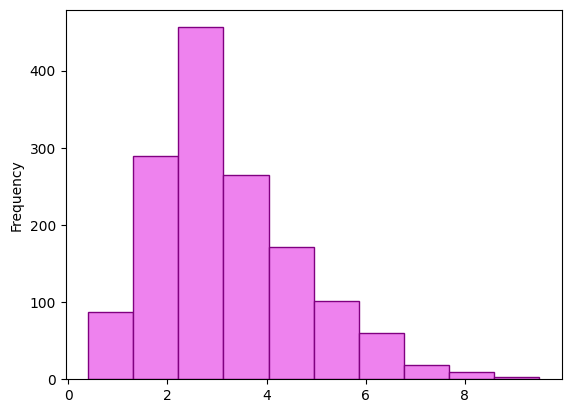

In [10]:
data["wind"].plot(kind = 'hist',color='#EE82EE',edgecolor='purple')
plt.show()

In [11]:
data = data.drop(["date"], axis = 1)

In [12]:
y = data['weather']
features =['temp_max', 'temp_min', 'precipitation', 'wind']
x = data[features]
x

,temp_max,temp_min,precipitation,wind
0,12.8,5.0,0.0,4.7
1,10.6,2.8,10.9,4.5
2,11.7,7.2,0.8,2.3
3,12.2,5.6,20.3,4.7
4,8.9,2.8,1.3,6.1
...,...,...,...,...
1456,4.4,1.7,8.6,2.9
1457,5.0,1.7,1.5,1.3
1458,7.2,0.6,0.0,2.6
1459,5.6,-1.0,0.0,3.4


In [13]:
from sklearn import preprocessing
lc = preprocessing.LabelEncoder()
data["weather"] = lc.fit_transform(data["weather"])

In [14]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [15]:
gbc = GradientBoostingClassifier()
gbcmodel = gbc.fit(x_train, y_train)
"Accuracy of GBC Model is "+str(gbc.score(x_test, y_test)*100)

'Accuracy of GBC Model is 84.98293515358361'

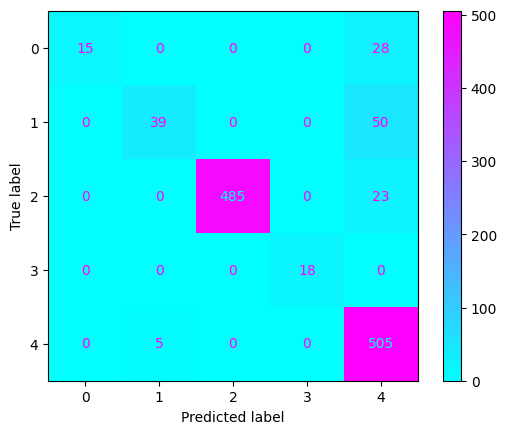

In [16]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = gbcmodel.predict(x_train)
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap=plt.cm.cool)
plt.show()